# Part II

---



I will be investigating the K-Nearest-Neighbours Classification
algorithm (KNN). I will be using it to undergo classification of the IRIS dataset \cite{IRIS_dataset}

## What is KNN classification?
KNN is a non-parametric, supervised learning classifier, which uses the distance between data-points to classify or predict the grouping of an individual point. Being non-parametric means that the algorithm makes no assumptions about the underlying data distribution. It should be noted that KNN can be used for both classification and regression, I will be focussing on classification. KNN is reliant on the idea that similar points will have similar labels or values, this is the main assumption of the model. The "K" in KNN, refers to the number of nearest neighbors that the algorithm considers when making a prediction. The basic idea is that if a majority of the k-nearest neighbors belong to a certain class (for classification), then the algorithm predicts that the new data point belongs to that class or has a similar value. It does this nomrally through calculating the Euclidean distance.

 The Euclidean distance between two points $P = (p_1, p_2, ..., p_n)$ and $Q = (q_1, q_2, ..., q_n)$ in an n-dimensional space is calculated using the following formula:

$\text{Euclidean Distance} = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$

In the case of KNN it uses this distance in the following way:

1. The distance is normally calculated between a test point and every
point in the specified training sample, where each sample is
represented as a vector.This is the main training phase of KNN. Unlike traditional model-based algorithms, KNN doesn't explicitly learn a model during training. Instead, it memorizes the entire training dataset and makes predictions based on the proximity of new data points to existing ones. \cite{KNNtraining}


2. The algorithm then identifies the "K"- nearest neighbours, i.e the points with the smallest Euclidean Distance from the point. I will later examine how we determine the "K".

3. It then guages which class label (feature) is most common amongst these K-nearest-neighbours and assigns the point to this common class-label.

To be clear, Euclidean distance is the most commonly used distance metric, however in specific cases other metrics such as
Manhattan Distance\cite{Manhattan_distance}or Minkowski Distance\cite{Minkowski_distance} (amongst others) may be used.

KNN is well-suited for smaller to medium-sized datasets with non-linear patterns and classification challenges. It excels in instance-based learning, making predictions based on data similarity. Notable applications include anomaly detection, but it may be less effective in high-dimensional spaces,due to The Curse of Dimensionality\cite{dimensionality}.

## Data Selection

I will be working with the Iris Data set. This is a world-famous dataset featured in R.A. Fisher's classic 1936 paper, "The Use of Multiple Measurements in Taxonomic Problems", and can also be found in many places. I will be importing it from scikitlearn for convenience but there is an addtional link to it here, from the UCI machine learning
repository\cite{UCI}:

https://www.kaggle.com/datasets/uciml/iris/data

#Importing the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define k-NN classifier
knn = KNeighborsClassifier()

# Importing iris, I have mounted the csv file to my google colab session.
iris = pd.read_csv('/content/drive/MyDrive/Iris.csv')


# Data Exploration

In [ ]:
#shape of dataset
shape = iris.shape

#Initial preview
head = iris.head(6)

#how labels are split
label_split = iris.groupby('Species').size()

print(shape); print(head); print(label_split)



(150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Initially, we can see that the dataset has 150 rows by 6 columns. This means there are 150 examples or entries for individual iris flowers. There is the one column indexing the flower, 4 columns containing features (Sepal length, Sepal Width, Petal lenth and Petal Width) and the one column classifying the plants into a one of three specific species (setosa, versicolor and virginica). When eventually classifying, the Species column will act as labels. This contains categorical data. The feature columns contain continuous data.

The following pairplot can be useful for visualising initial clusters.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

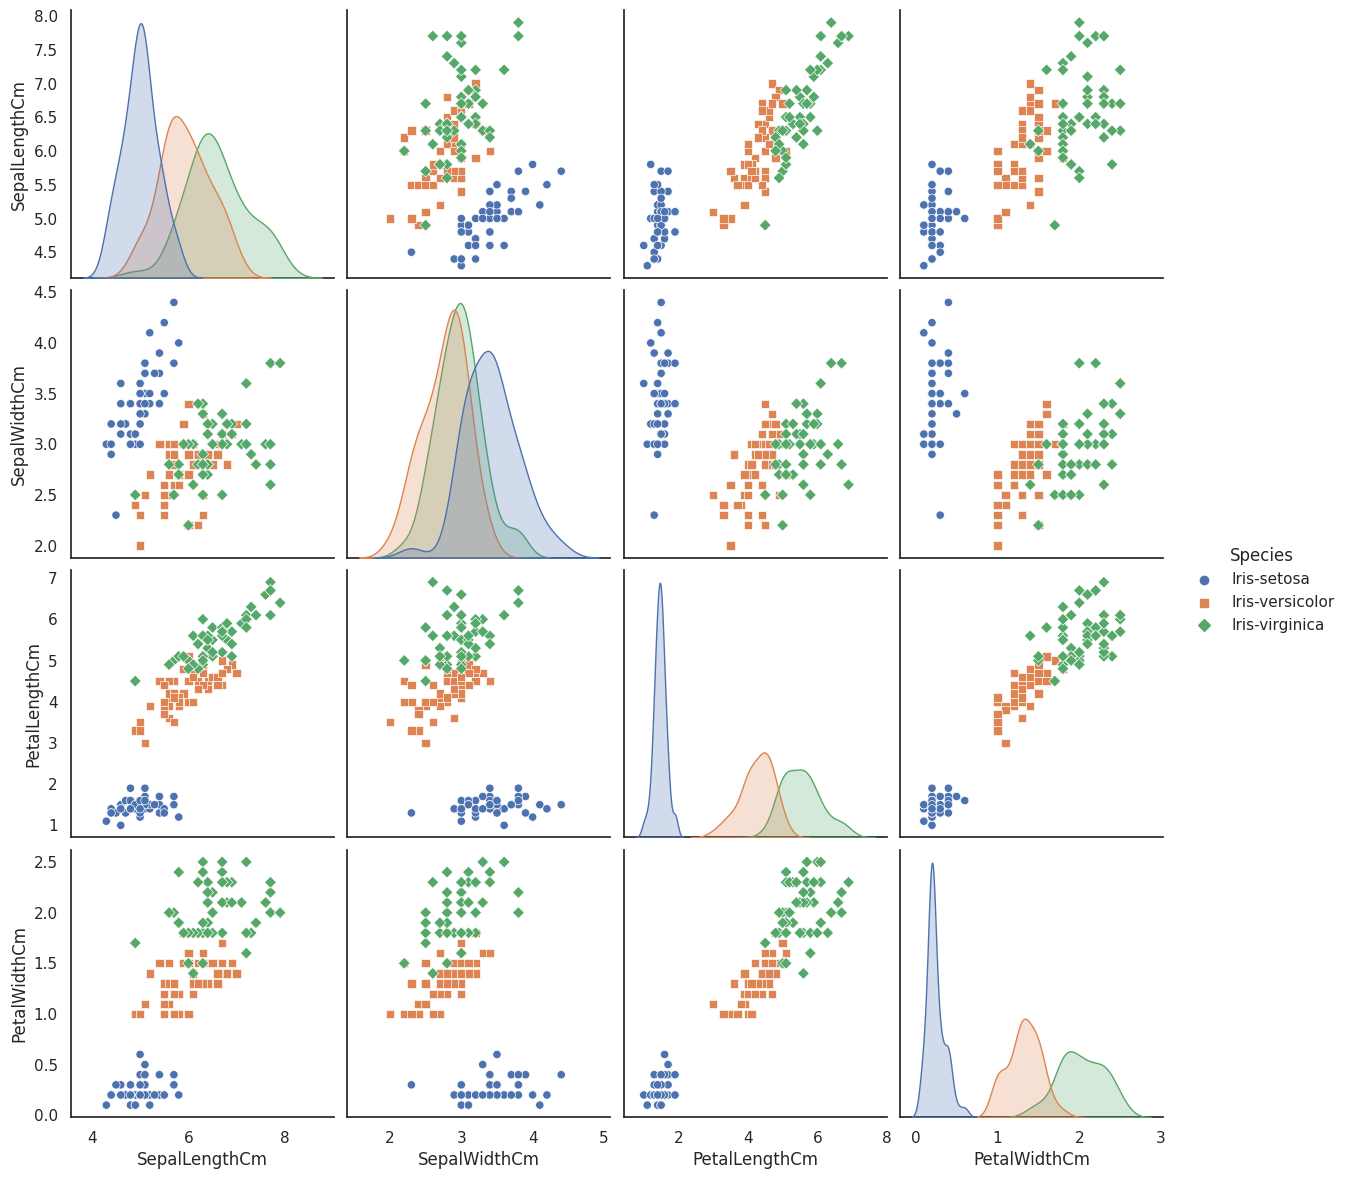

In [ ]:
sns.set(style="white", color_codes=True)
plt.figure()
sns.pairplot(iris.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

For example, if I observe distinct clusters of points for different species in the scatterplots. This could indicate that the corresponding pair of features is informative for classifying the iris species. Here we can see that setosa tends to be a distinct cluster when examining the relative features, whereas versicolor and virginica have a lot of overlap.



# Train/Test Split

As is standard I will now split the data into training, validation and test sets; ready to undergo classification. Before doing this I split the data into features (X) and labels (y). I also perform label encoding on y. Label encoding is a way of taking a categorical variable that is represented non-numerically and converting it into a numerical format. Hence, Iris-setosa will correspond to 0, Iris-versicolor to 1 and Iris-virginica to 2.

In [ ]:
# selecting features and labels arrays:
X = iris.iloc[:, 1:5].values
y = iris.iloc[:, 5].values

# Perform label encoding for the target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

I have split the data into training, validation and test sets.

1. Training Set (X_train, y_train):

  The model learns patterns and relationships in the data from this set.
  In the code, train_test_split is used to split the original dataset into training and temporary (combined validation and test) sets.

2. Validation Set (X_val, y_val):

  The validation set is a subset of the training set, used to test different hyperparameters etc, to find optimal results. It prevents the test data from being used to train, hence avoiding contamination in the simulation.

3. Test Set (X_test, y_test):

  The test set is completely, previosuly unseen data to the model. We use this after training and validation has been complete, to guage how well the model works on data that is completely new.

# 3

Instead of building my own KNN function, I have opted to use *KNeighborsClassifier* from the sklearn.neighbours package.

Later on I will investigate optimising hyperparamters and cross-validation techniques, but before I do, I will investigate the result on differing sizes of training data on the variance.

I do this by first creating a numpy array of evenly distributed subset sizes from 0.1 to 1, i.e 10%-100% of the training data size. I then create a loop which, continuously makes random subsets of these sizes, trains the KNN classifier on this subset and then tests this on the validation set. I compute the variances for each predicted sample and take an average and append this to my variances list.

The plot below shows the distribution of variance as the subset size increases.

/usr/local/lib/python3.10/dist-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


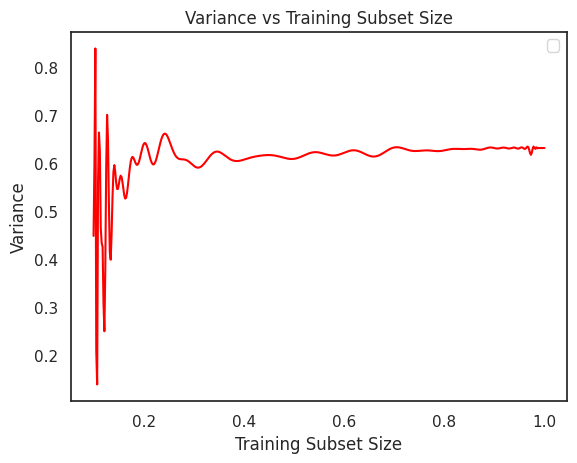

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

#setting seed for reproducability
np.random.seed(0)

# Generate 500 evenly spaced subset sizes from 0.1 to 1, KNN does not work with 0.
subsets = np.linspace(0.1, 1, 500)
subsets = np.array(subsets)

variances = []

for i in subsets:
      # Create a random subset of the training data
      subsets_random = np.random.choice(len(X_train), size=int(i * len(X_train)), replace=False)
      X_subset = X_train[subsets_random]
      y_subset = y_train[subsets_random]

      # Train the KNN model
      knn_classifier = KNeighborsClassifier(n_neighbors=3)
      knn_classifier.fit(X_subset, y_subset)

      # Make predictions
      y_val_pred = knn_classifier.predict(X_val)

      # Compute the variance
      pred_variances = np.var(y_val_pred, axis=0)

      # Average the variances over the validation set
      average_variance = np.mean(pred_variances)
      variances.append(average_variance)



# Fit a polynomial to the data for a smoother curve
p = Polynomial.fit(subsets, variances, 500)

# Plotting the variance against subset sizes
plt.plot(subsets, p(subsets), color='red')
plt.title('Variance vs Training Subset Size')
plt.xlabel('Training Subset Size')
plt.ylabel('Variance')
plt.legend()
plt.show()





As shown by the above graph, the magnitude in the varying degree of variance, begins to settle at a variance value of around 0.6, as the subset size reaches 40% of its original size.   


Initially, with very small subset sizes, the model might suffer from [underfitting](https://www.ibm.com/topics/underfitting). The limited amount of data leads to high variability in the model's predictions on the validation set.

As the subset size increases, the model becomes more exposed to the training data, allowing it to capture more meaningful patterns.
With a larger subset, the model's predictions on the validation set become more stable and consistent, resulting in a decrease in variance.

Beyond a certain subset size, increasing the size further may not provide substantial additional information for the model to improve its predictions and could lead to overfitting. The variance settles at a certain value, indicating that the model has reached a point of stability and additional data may not lead to significant changes in performance.

Hence, from this experiment we can conclude that the model has adequate data at around 40% of its original size.

# Investigating KNN in more detail

Whilst the above validation experiment provides a solid insight into how we reduce variance amongst training results, it is basic and does not account for many things, for example the number of neighbours in that simulation was set at an arbitary value of 3 and not investigated.

I will now investigate how best to accurately train the model focussing on the k of the KNN as my hyperparameter to be optimised. I will do this through cross-validation and analyse the results on the validation and test sets through metrics of accuracy and F1-score.


## Hyperparamter Tuning

When using KNN, the most important hyperparameter to optimise is the value of k that is selected. To do this I will be using a grid-search cross-validation technqiue. It is, therefore, necessary for me to define both Grid-search and Cross-Validation.

## Cross Validation

Cross Validation involves splitting the data into many training and validation sets, like we did before, and then assessing the best result for numbers of k.

## Grid Search

Grid Search is an exhaustive algorithm, that places all possible hyperparameters on a grid and then attempts every combination of them over a specified number of cross-validations, until the best score is returned.[ref](https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/). In the case of our grid search algorithm, we will be examining the Accuracy score.

## Accuracy, Precision, Recall and F1-Score

Accuracy is defined as the ratio between the number of correct predictions to the total number of predictions. It is best applied when classes are of equal importance and should be used skeptically if the data is known to be imbalanced.

The precision measures the model's accuracy in classifying a sample as positive. [ref](https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/#:~:text=Accuracy%20is%20a%20metric%20that,the%20total%20number%20of%20predictions.). It is the ratio between the True Positives and True Positives + False Positives.

Recall is only concerned with how many positive samples are correctly classified as positive. This means it is independent of negative samples being misclassified as positive.

Precision and Recall are combined in the F1 metric. This metric is perfect for when Accuracy falls down; when classes are imbalanced. It is calculated as the harmonic mean of Precision and Recall scores.

Now from the earlier data analysis, we know that each of the 3 classes has 50 samples, so they are perfectly balanced. Even still, I will use the F1 score as a sanity check on my accuracy scores.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define k-NN classifier
knn = KNeighborsClassifier()

# Define hyperparameter grid
grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter
best_k = grid_search.best_params_['n_neighbors']
print(best_k)

5


My grid search with cross-validation returns the optimal k value as 5. It should be noted that I only tested for odd values of k, as this is a common practice to avoid ties when determining which class a data point should belong to.


I now train the KNN classifier with this optimal k and test it on my validation data.

In [ ]:
# Train k-NN with the best hyperparameter
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)


# Predictions on the validation set
y_val_pred = best_knn.predict(X_val)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred, average='weighted')

print('Accuracy:', accuracy, 'F1-score:',f1)




Accuracy: 0.9333333333333333 F1-score: 0.9342592592592591


We see a high accuracy with a matching f1 score as a sanity check. Next step is to test our trained model on the test data. might be wise to hold off until all possible testing is done. such as optimising other hyperparams etc.

# 6

As afforementioned, this experiment used KNN with Euclidean distance as the distance metric. This is the most commonly used distance metric, yet it is not the only one. Of course there are many different ways of calculating distance that could be used, giving different insights when used correctly. I would now like to examine, the other most popular ways of calculating distance.

## Minkowski Distance
The Minkowski Distance is a normed vector space, which is a generalization of both the Euclidean Distance and Manhattan Distance [ref](https://en.wikipedia.org/wiki/Minkowski_distance#:~:text=The%20Minkowski%20distance%20or%20Minkowski,the%20German%20mathematician%20Hermann%20Minkowski.). To be normed means disrtances are represented as a vector that has non-negative length and satisfies:

- positivity: $|a,b| > 0$
- triangle inequality: $|a + b| \leq |a| + |b|$
- identity: $|a,b| = 0 \iff a == b$
- symmetry: $|a,b| = |b,a|$

the formula is as follows:

For two points, $ (x_1, y_1)$ and $(x_2, y_2)$ in a two-dimensional space:
$$
D(x, y, p) = \left( \left| x_1 - x_2 \right|^p + \left| y_1 - y_2 \right|^p \right)^{1/p}
$$
$$
D(\mathbf{X}, \mathbf{Y}, p) = \left( \sum_{i=1}^{n} \left| X_i - Y_i \right|^p \right)^{1/p}
$$

As you can see, setting p = 2, results in the Euclidean distance and p = 1 results in the Manhattan Distance, which I will discuss next.

## Manhattan Distance
The Manhattan Distance is the distance between two points defined to be the sum of the absolute differences of their Cartesian coordinates. It is often referred to as [*Taxicab Geometry*](https://en.wikipedia.org/wiki/Taxicab_geometry), as it can be understood by placing all points on a two-dimensional grid and finding the shortest, non-diagonal path to traverse between two points, much like a taxicab would in the Island of Manhattan.

It is defined mathematically below;

$ D(\mathbf{X}, \mathbf{Y}) = \sum_{i=1}^{n} \left| X_i - Y_i \right|$

The Manhattan Distance, is typically utilised in datasets with high-dimensionallity. This is because it does not take any squares and hence does not amplify the difference between features. [ref](https://www.educative.io/answers/what-is-manhattan-distance-in-machine-learning).

## Chebyshev Distance
Chebyshev distance, also referred to as chessboard distance, quantifies the distance between data points by assessing the greatest distance among their respective coordinates. It can alson be derived by substituting ∞ into the Minkowski equation. [ref](https://iopscience.iop.org/article/10.1088/1742-6596/2161/1/012004/pdf#:~:text=The%20performance%20of%20the%20kNN%20classifier%20was%20analyzed%20by%20applying,Euclidean%20distance%20metric%20was%20used.)

$D(\mathbf{X}, \mathbf{Y}) = \max_{i=1}^{n} \left| X_i - Y_i \right|$

## Cosine Distance

The cosine distance is typically used to determine the dissimilarity between two vectors.
$D(\mathbf{X}, \mathbf{Y}) = 1 - \frac{\mathbf{X} \cdot \mathbf{Y}}{\|\mathbf{X}\| \cdot \|\mathbf{Y}\|}$, where $cosθ = \frac{\mathbf{X} \cdot \mathbf{Y}}{\|\mathbf{X}\| \cdot \|\mathbf{Y}\|}$.

It is defined mathematically above as the inverse of cosine similarity. Hence, a lower distance score indicates a higher similarity betweeen two vectors. A common usage of cosine distance in in sentiment analaysis, analysing the similarity between two corpuses of text.

## Jaccard Distance

Jaccard Distance or Similarity, is another similarity measure, normally used to measure the similarity between two objects or sets.

$D(\mathbf{A}, \mathbf{B}) = 1 - \frac{\left| \mathbf{A} \cap \mathbf{B} \right|}{\left| \mathbf{A} \cup \mathbf{B} \right|}$

Now that I have covered some of the more popular distance metrics, I will run some tests to demonstrate their applicability to certain situations.

From the above descriptions of the distance metrics, when using them as the specified distance metric for KNN, we would expect some variation in performance. We would expect, given the well-separated clusters of iris species in the feature space, that Euclidean distance would be the best metric for this analysis. We should also find that Manhattan, Chebyshev and Cosine Distances works well but do not offer significant advantages over Euclidean. As Jaccard is typically used in datasets, where an exclsusion of features matters, we might find that it is not suitable for this setting.



I adjust the above code to view how both the optimal number of k and the accuracies change for the KNN model, when experiementing with different distance metrics.

In [ ]:


# Define a list of distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'jaccard']



# Iterate over distance metrics
for j in distance_metrics:
    print(f"Testing with {j} distance:")

    # Define k-NN classifier
    knn = KNeighborsClassifier(metric=j)

    # Define hyperparameter grid
    grid_q6 = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn, grid_q6, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best k
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k for {j} distance: {best_k}")

    # Train k-NN with the best hyperparameter
    best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=j)
    best_knn.fit(X_train, y_train)

    # Predictions on the validation set
    y_val_pred = best_knn.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy for {j} distance: {accuracy}")



Testing with euclidean distance:
Best k for euclidean distance: 5
Accuracy for euclidean distance: 0.9333333333333333
Testing with manhattan distance:
Best k for manhattan distance: 9
Accuracy for manhattan distance: 0.9333333333333333
Testing with chebyshev distance:
Best k for chebyshev distance: 3
Accuracy for chebyshev distance: 0.9333333333333333
Testing with cosine distance:
Best k for cosine distance: 1
Accuracy for cosine distance: 0.9
Testing with jaccard distance:
Best k for jaccard distance: 1
Accuracy for jaccard distance: 0.3


As expected the accuracies between Euclidean, Manhattan, Chebyshev and Cosine are practically the same, with Jaccard distance giving a very poor accuracy. What is interesting to note is the varying value of the best-k. The k-value can vary for many reasons. The ideal k value in KNN can differ for various distance metrics due to specific dataset characteristics. For instance, Euclidean distance, sensitive to spatial separation, might perform differently than Manhattan distance, which considers distances along coordinate axes.

I will store the models generated for Euclidean, manhattan and Chebyshev and test them on the test data. This will be the ultimate test on which model is most suitable for the given dataset.

# Euclidean, k_number = 5

In [ ]:
# Train k-NN with the best hyperparameter
best_knn = KNeighborsClassifier(n_neighbors=5, metric ='euclidean')
best_knn.fit(X_train, y_train)

# Predictions on the validation set
y_t_pred = best_knn.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_t_pred)
f1 = f1_score(y_test, y_t_pred, average='weighted')

print('Accuracy:', accuracy, 'F1-score:',f1)


Accuracy: 0.9666666666666667 F1-score: 0.9664109121909632


# manhattan, k_number = 9

In [ ]:
# Train k-NN with the best hyperparameter
best_knn = KNeighborsClassifier(n_neighbors=9, metric ='manhattan')
best_knn.fit(X_train, y_train)

# Predictions on the validation set
y_t_pred = best_knn.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_t_pred)
f1 = f1_score(y_test, y_t_pred, average='weighted')

print('Accuracy:', accuracy, 'F1-score:',f1)

Accuracy: 1.0 F1-score: 1.0


# Chebyshev, k_number = 3

In [ ]:
# Train k-NN with the best hyperparameter
best_knn = KNeighborsClassifier(n_neighbors=3, metric ='chebyshev')
best_knn.fit(X_train, y_train)

# Predictions on the validation set
y_t_pred = best_knn.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_t_pred)
f1 = f1_score(y_test, y_t_pred, average='weighted')

print('Accuracy:', accuracy, 'F1-score:',f1)

Accuracy: 0.9666666666666667 F1-score: 0.9664109121909632


# Jaccard, k_number = 1

In [ ]:
# Train k-NN with the best hyperparameter
best_knn = KNeighborsClassifier(n_neighbors=1, metric ='jaccard')
best_knn.fit(X_train, y_train)

# Predictions on the validation set
y_t_pred = best_knn.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_t_pred)
f1 = f1_score(y_test, y_t_pred, average='weighted')

print('Accuracy:', accuracy, 'F1-score:',f1)

Accuracy: 0.3333333333333333 F1-score: 0.16666666666666666


In this final part of the study I have investigated different distance metrics that can be used in the KNN classifier. The distance metric is just one of the many possible hyperparameters to focus on and optimise and in further studies it would be worth investigating others, such as weightings, in more detail. For the purposes of this, I have not investigated others, allowing for more detail on my chosen metrices.